In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading tables into dataframes
drug_df = pd.read_csv('drug_fda.csv')
new_drug_df = drug_df[['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname',
       'val_vbm', 'cum_dose_chr', 'cum_dose_unit', 'lot_num']]

demo_df = pd.read_csv('demo_fda.csv')
new_demo_df = demo_df[['primaryid', 'caseid', 'caseversion', 'age', 'age_cod',
       'sex', 'wt', 'wt_cod', 'occp_cod', 'reporter_country', 'occr_country',
       'occp_cod_num']]

outcomes_df = pd.read_csv('outcomes_fda.csv')

reactions_df = pd.read_csv('reaction_fda.csv')

/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
new_drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546835 entries, 0 to 1546834
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   primaryid      1546835 non-null  int64  
 1   caseid         1546835 non-null  int64  
 2   drug_seq       1546835 non-null  int64  
 3   role_cod       1546835 non-null  object 
 4   drugname       1546823 non-null  object 
 5   val_vbm        1546835 non-null  int64  
 6   cum_dose_chr   49001 non-null    float64
 7   cum_dose_unit  49011 non-null    object 
 8   lot_num        236716 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 106.2+ MB


In [4]:
new_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394066 entries, 0 to 394065
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         394066 non-null  int64  
 1   caseid            394066 non-null  int64  
 2   caseversion       394066 non-null  int64  
 3   age               235444 non-null  float64
 4   age_cod           235452 non-null  object 
 5   sex               347760 non-null  object 
 6   wt                81142 non-null   float64
 7   wt_cod            81142 non-null   object 
 8   occp_cod          387070 non-null  object 
 9   reporter_country  394066 non-null  object 
 10  occr_country      394053 non-null  object 
 11  occp_cod_num      387070 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 36.1+ MB


In [5]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299135 entries, 0 to 299134
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   primaryid  299135 non-null  int64 
 1   caseid     299135 non-null  int64 
 2   outc_cod   299135 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [6]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250978 entries, 0 to 1250977
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   primaryid     1250978 non-null  int64 
 1   caseid        1250978 non-null  int64 
 2   pt            1250978 non-null  object
 3   drug_rec_act  2988 non-null     object
dtypes: int64(2), object(2)
memory usage: 38.2+ MB


In [7]:
drug_demo = new_drug_df.merge(new_demo_df, on='primaryid', how='left')
drug_demo

,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,caseid_y,caseversion,age,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num
0,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
1,36703554,3670355,2,PS,HYDROCHLOROTHIAZIDE.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
2,36703554,3670355,3,SS,LOSARTAN.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
3,36703554,3670355,4,SS,FELODIPINE.,1,NaN,NaN,NaN,3670355,4,1.0,DY,F,2.200000,KG,OT,CA,BE,7984.0
4,37617136,3761713,1,PS,GLIVEC,1,7200.0,MG,NaN,3761713,6,58.0,YR,M,48.599998,KG,MD,JP,JP,7768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546830,1559507712,15595077,17,C,MELPHALAN.,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0
1546831,1559507712,15595077,18,C,G-CSF,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0
1546832,1559507712,15595077,19,C,CYCLOPHOSPHAMIDE.,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0
1546833,1559507712,15595077,20,C,PLERIXAFOR,1,NaN,NaN,NaN,15595077,12,60.0,YR,F,NaN,NaN,OT,SK,SK,7984.0


In [8]:
reporter_counts = drug_demo.reset_index().groupby('occp_cod').nunique()
'''
CN = Consumer
LW = Lawyer
MD = Physician
OT = Other health-care professional
PH = Pharmacist
'''
reporter_counts

,index,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,...,caseversion,age,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num
occp_cod,,,,,,,,,,,,,,,,,,,,,
CN,538631,168973,168973,310,4,28474,2,2399,19,23336,...,50,698,6,3,2594,2,1,120,130,1
LW,41199,6431,6431,259,4,2774,2,364,7,72,...,17,87,4,2,376,1,1,15,14,1
MD,425845,99246,99246,227,4,27834,2,4258,20,10998,...,60,476,6,3,2176,2,1,137,137,1
OT,354945,80654,80654,200,4,23323,2,2797,22,9293,...,48,179,6,3,2207,2,1,122,124,1
PH,115688,31766,31766,256,4,13614,2,854,14,4211,...,27,141,5,3,1357,2,1,75,75,1


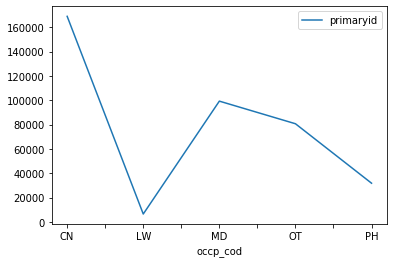

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
reporter_counts.plot(y = 'primaryid')
plt.show()
plt.savefig(fname='reporter_counts')

In [10]:
drug_demo_outcomes = drug_demo.merge(outcomes_df,on='primaryid',how='left')
drug_demo_outcomes

,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,caseid_y,...,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num,caseid,outc_cod
0,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,CA
1,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,DE
2,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,DS
3,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,HO
4,36703554,3670355,1,SS,METOPROLOL.,1,NaN,NaN,NaN,3670355,...,DY,F,2.2,KG,OT,CA,BE,7984.0,3670355.0,LT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007861,1559507712,15595077,17,C,MELPHALAN.,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT
2007862,1559507712,15595077,18,C,G-CSF,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT
2007863,1559507712,15595077,19,C,CYCLOPHOSPHAMIDE.,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT
2007864,1559507712,15595077,20,C,PLERIXAFOR,1,NaN,NaN,NaN,15595077,...,YR,F,NaN,NaN,OT,SK,SK,7984.0,15595077.0,OT


In [11]:
outcome_counts = drug_demo_outcomes.reset_index().groupby('outc_cod').nunique()

'''
CA = congenital anomaly
DE = death
DS = disability
HO = Hospitalization - initial or prolonged
LT = life-threatening
OT = other serious (important medical event)
RI = required intervention to prevent permanent impairment/damage
'''

outcome_counts

,index,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,...,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num,caseid,outc_cod
outc_cod,,,,,,,,,,,,,,,,,,,,,
CA,5760,1335,1335,71,3,1472,2,126,9,66,...,6,3,197,1,5,50,50,5,1335,1
DE,149112,31964,31964,256,4,14238,2,1710,16,2794,...,6,3,1200,2,5,124,131,5,31964,1
DS,39454,6410,6410,124,4,7157,2,721,11,1027,...,5,2,745,2,5,82,81,5,6410,1
HO,562203,94243,94243,227,4,35855,2,4518,20,11997,...,6,3,2512,2,5,133,132,5,94243,1
LT,78221,12113,12113,195,4,11366,2,1235,18,1373,...,5,3,973,2,5,101,102,5,12113,1
OT,793599,152703,152703,310,4,38789,2,5473,21,15891,...,6,3,2773,2,5,149,149,5,152703,1
RI,755,367,367,28,3,419,2,0,0,40,...,3,2,146,2,4,2,2,4,367,1


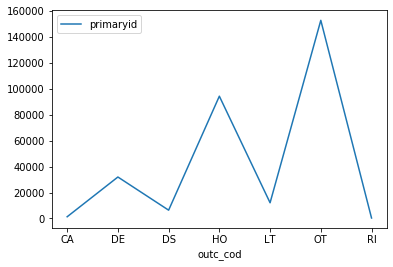

<Figure size 432x288 with 0 Axes>

In [12]:
outcome_counts.plot(y = 'primaryid')
plt.show()
plt.savefig(fname='outcome_counts')

In [13]:
reactions_df = pd.read_csv('reaction_fda.csv')
merged_df = drug_demo_outcomes.merge(reactions_df, on='primaryid',how='left')

In [14]:
merged_df['drugname'].describe()

count     11231379
unique       61843
top         XOLAIR
freq        335438
Name: drugname, dtype: object

In [15]:
# ages = merged_df.reset_index().groupby('age').nunique()
# ages
# # ages.plot(y='age',kind='hist', bins=100)
# # plt.show()

In [16]:
drug_demo[['age','age_cod']]
drug_demo['age_cod'].unique()

def code_to_numeric(code):
    '''
    Converts age units to age in years
    '''
    if code == 'DY':
        return 1/365
    if code == 'YR':
        return 1
    if code == np.nan:
        return 0
    if code == 'MON':
        return 1/12
    if code == 'DEC':
        return 10
    if code == 'WK':
        return 7/365
    if code == 'HR':
        return 1/8760


In [17]:
drug_demo['age_multiplier'] = drug_demo['age_cod'].map(code_to_numeric)
drug_demo['age_multiplier']

0          0.00274
1          0.00274
2          0.00274
3          0.00274
4          1.00000
            ...   
1546830    1.00000
1546831    1.00000
1546832    1.00000
1546833    1.00000
1546834    1.00000
Name: age_multiplier, Length: 1546835, dtype: float64

In [18]:
drug_demo['age_in_years'] = drug_demo['age'] * drug_demo['age_multiplier']
(drug_demo['age_in_years']).describe()

count    1.084821e+06
mean     5.829352e+01
std      1.909927e+01
min     -1.000000e+01
25%      4.800000e+01
50%      6.200000e+01
75%      7.200000e+01
max      1.170000e+02
Name: age_in_years, dtype: float64

/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.01350e+04, 2.99050e+04, 5.55480e+04, 8.74200e+04, 1.73474e+05,
        3.13632e+05, 2.86195e+05, 1.21340e+05, 7.05800e+03, 1.14000e+02]),
 array([-10. ,   2.7,  15.4,  28.1,  40.8,  53.5,  66.2,  78.9,  91.6,
        104.3, 117. ]),
 <a list of 10 Patch objects>)

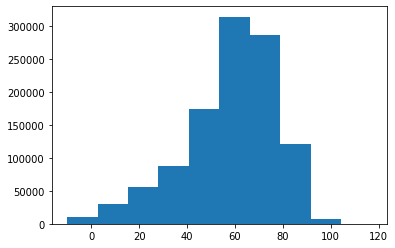

In [19]:
plt.hist(drug_demo['age_in_years'])

In [20]:
drug_demo[['wt_cod','wt']]
drug_demo['wt_cod'].unique()

def weight_conversion(code):
    '''
    converts weight units to weight in lbs
    '''
    if code == 'KG':
        return 2.20462
    if code == np.nan:
        return 0
    if code == 'LBS':
        return 1


In [21]:
drug_demo['weight_multiplier'] = drug_demo['wt_cod'].map(weight_conversion)
drug_demo['weight_multiplier']

0          2.20462
1          2.20462
2          2.20462
3          2.20462
4          2.20462
            ...   
1546830        NaN
1546831        NaN
1546832        NaN
1546833        NaN
1546834        NaN
Name: weight_multiplier, Length: 1546835, dtype: float64

In [22]:
drug_demo['wt_in_lbs'] = drug_demo['weight_multiplier'] * drug_demo['wt']
drug_demo['wt_in_lbs']

0            4.850164
1            4.850164
2            4.850164
3            4.850164
4          107.144529
              ...    
1546830           NaN
1546831           NaN
1546832           NaN
1546833           NaN
1546834           NaN
Name: wt_in_lbs, Length: 1546835, dtype: float64

(array([5.21651e+05, 6.90000e+01, 5.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([   0.     ,  637.13518, 1274.27036, 1911.40554, 2548.54072,
        3185.6759 , 3822.81108, 4459.94626, 5097.08144, 5734.21662,
        6371.3518 ]),
 <a list of 10 Patch objects>)

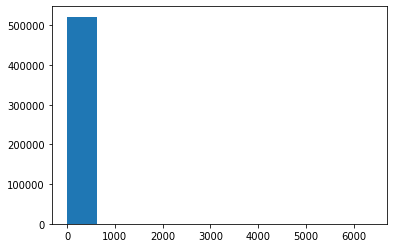

In [23]:
plt.hist(drug_demo['wt_in_lbs'])

In [24]:
drug_demo[drug_demo['wt_in_lbs'] == drug_demo['wt_in_lbs'].max()]

,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,caseid_y,...,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num,age_multiplier,age_in_years,weight_multiplier,wt_in_lbs
781043,155361851,15536185,1,PS,Amoxicillin/Clavulanic acid,1,NaN,NaN,NaN,15536185,...,2890.0,KG,MD,BA,BA,7768.0,NaN,NaN,2.20462,6371.3518
781044,155361851,15536185,2,SS,Cefalexin,1,NaN,NaN,NaN,15536185,...,2890.0,KG,MD,BA,BA,7768.0,NaN,NaN,2.20462,6371.3518
781045,155361851,15536185,3,SS,DEXAMETHASONE.,1,NaN,NaN,NaN,15536185,...,2890.0,KG,MD,BA,BA,7768.0,NaN,NaN,2.20462,6371.3518


In [25]:
drug_demo = drug_demo[drug_demo['wt_in_lbs'] <= 500]
drug_demo = drug_demo[drug_demo['age'] > 0]
drug_demo.shape

(453821, 24)

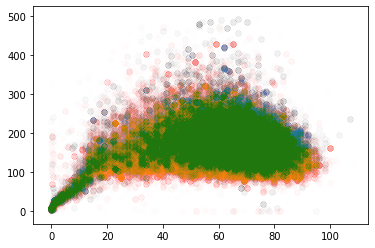

In [26]:
plt.scatter(drug_demo['age_in_years'][drug_demo['sex'] == 'M'], drug_demo['wt_in_lbs'][drug_demo['sex']=='M'], alpha=0.005)
plt.scatter(drug_demo['age_in_years'][drug_demo['sex'] == 'F'], drug_demo['wt_in_lbs'][drug_demo['sex']=='F'], alpha=0.005)



In [27]:
drug_demo['age_group'] = (drug_demo['age_in_years'] // 10) * 10 
drug_demo.groupby(['age_group','sex']).count()['primaryid']

age_group  sex
0.0        F       3719
           M       5387
10.0       F       6511
           M       5421
20.0       F       9584
           M       4563
30.0       F      16258
           M       8222
40.0       F      28468
           M      16505
50.0       F      50074
           M      32669
60.0       F      68449
           M      50676
70.0       F      52006
           M      47945
80.0       F      22907
           M      18195
90.0       F       2950
           M       1701
100.0      F        106
           M         33
Name: primaryid, dtype: int64

In [54]:
x = drug_demo.groupby(['age_group','sex'])
top_drugs_per_age = x['drugname'].describe()
top_drugs_per_age

count unique             top  freq
age_group sex                                    
0.0       F     3719   1277      GENOTROPIN    69
          M     5387   1648     VINCRISTINE   109
10.0      F     6511   1801        REMICADE   149
          M     5421   1634      GENOTROPIN   192
20.0      F     9584   2651       NEXPLANON   291
          M     4563   1621          HUMIRA   116
30.0      F    16258   3776          XOLAIR   376
          M     8222   2424          XOLAIR   107
40.0      F    28468   5189        TAXOTERE   830
          M    16505   3780          NEXIUM   166
50.0      F    50074   7083        TAXOTERE  1073
          M    32669   5507          NEXIUM   581
60.0      F    68449   8933          LYRICA   967
          M    50676   7832  DEXAMETHASONE.   680
70.0      F    52006   7801          LYRICA   584
          M    47945   7482  DEXAMETHASONE.   598
80.0      F    22907   4565     FUROSEMIDE.   295
          M    18195   4061         XARELTO   265
90.0      F     2950   1184     FUROSEMIDE.    56
          M     1701    793         XARELTO    39
100.0     F      106     44     PARACETAMOL     8
          M       33     20   ROSUVASTATIN.     4

In [59]:
age_sex_grouped = drug_demo.groupby(['age_group','sex']).count()
top_drugs_per_age['percentage'] = (top_drugs_per_age['freq'] / age_sex_grouped['primaryid']) * 100
top_drugs_per_age

count unique             top  freq proportion percentage
age_group sex                                                          
0.0       F     3719   1277      GENOTROPIN    69  0.0185534    1.85534
          M     5387   1648     VINCRISTINE   109  0.0202339    2.02339
10.0      F     6511   1801        REMICADE   149  0.0228843    2.28843
          M     5421   1634      GENOTROPIN   192  0.0354178    3.54178
20.0      F     9584   2651       NEXPLANON   291  0.0303631    3.03631
          M     4563   1621          HUMIRA   116  0.0254219    2.54219
30.0      F    16258   3776          XOLAIR   376  0.0231271    2.31271
          M     8222   2424          XOLAIR   107  0.0130139    1.30139
40.0      F    28468   5189        TAXOTERE   830  0.0291555    2.91555
          M    16505   3780          NEXIUM   166  0.0100576    1.00576
50.0      F    50074   7083        TAXOTERE  1073  0.0214283    2.14283
          M    32669   5507          NEXIUM   581  0.0177844    1.77844
60.0      F    68449   8933          LYRICA   967  0.0141273    1.41273
          M    50676   7832  DEXAMETHASONE.   680  0.0134186    1.34186
70.0      F    52006   7801          LYRICA   584  0.0112295    1.12295
          M    47945   7482  DEXAMETHASONE.   598  0.0124726    1.24726
80.0      F    22907   4565     FUROSEMIDE.   295  0.0128782    1.28782
          M    18195   4061         XARELTO   265  0.0145644    1.45644
90.0      F     2950   1184     FUROSEMIDE.    56  0.0189831    1.89831
          M     1701    793         XARELTO    39  0.0229277    2.29277
100.0     F      106     44     PARACETAMOL     8  0.0754717    7.54717
          M       33     20   ROSUVASTATIN.     4   0.121212    12.1212